In [75]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/ivpassignment2/fingerprint.png
/kaggle/input/ivpassignment2/enhancedfingerprint.png
/kaggle/input/ivpassignment2/disks.png
/kaggle/input/ivpassignment2/FM_img.png
/kaggle/input/ivpassignment2/corner_test.png
/kaggle/input/ivpassignment2/ball.bmp
/kaggle/input/ivpassignment2/FM_img1.jpg
/kaggle/input/ivpassignment2/FM_img2.jpg


In [76]:
import cv2
import math
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt

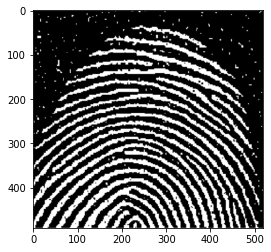

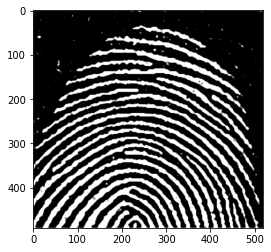

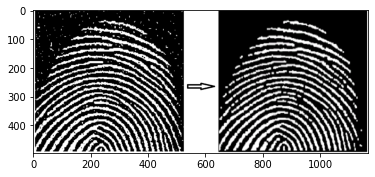

In [77]:
img = cv2.imread('/kaggle/input/ivpassignment2/fingerprint.png') # 0 for grayscale mode
finalimg = cv2.imread('/kaggle/input/ivpassignment2/enhancedfingerprint.png')
img2 = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img2gray = cv2.medianBlur(img2,5)
im1 = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
im = cv2.medianBlur(im1,5)
#r, img = cv2.threshold(img, 130, 255, cv2.THRESH_BINARY_INV)
#Show the image with matplotlib
plt.imshow(img2)
plt.show()
plt.imshow(cv2.cvtColor(im,cv2.COLOR_BGR2RGB))
plt.show()
plt.imshow(cv2.cvtColor(finalimg,cv2.COLOR_BGR2RGB))
plt.show()

In [78]:
kernel = np.ones((5,5),np.uint8)
print(kernel)

[[1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]]


In [79]:
s = im.shape
print(s)
print(im)

(491, 519)
[[255 255 255 ... 255 255 255]
 [255 255 255 ... 223 189 178]
 [255 255 174 ... 178   9   0]
 ...
 [255 255 255 ...   0   0   0]
 [255 255 255 ...   0   0   0]
 [255 255 255 ...  94  94  94]]


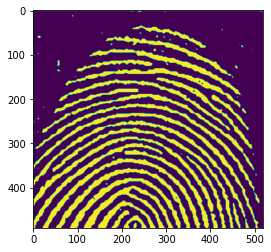

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255   0   0]
 ...
 [255 255 255 ...   0   0   0]
 [255 255 255 ...   0   0   0]
 [255 255 255 ...   0   0   0]]


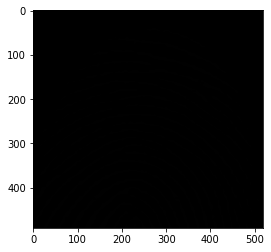

[[1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 0 0]
 ...
 [1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]]


In [80]:
ret, bw_img = cv2.threshold(im, 127, 255, cv2.THRESH_BINARY)
  
# converting to its binary form
bw = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
plt.imshow(bw_img)
plt.show()
print(bw_img)
np_img = np.array(bw_img)
np_img[np_img > 0] = 1
plt.imshow(cv2.cvtColor(np_img,cv2.COLOR_GRAY2RGB))
plt.show()
print(np_img)

In [81]:
def add_padding(image, padding, value):
    return cv2.copyMakeBorder(image, padding, padding, padding, padding, cv2.BORDER_CONSTANT, value=value)

def operation(image, kernel, padding=0, operation=None):
    if operation:
        img_operated = image.copy() #this will be the image

        padding_value = 0           # <<< ADDED
        if operation == "erosion":  # <<< ADDED
            padding_value = 1       # <<< ADDED
        padded = add_padding(image, padding, padding_value)  # <<< MODIFIED

        vertical_window = padded.shape[0] - kernel.shape[0] #final vertical window position
        horizontal_window = padded.shape[1] - kernel.shape[1] #final horizontal window position

        #start with vertical window at 0 position
        vertical_pos = 0

        #sliding the window vertically
        while vertical_pos <= vertical_window:
            horizontal_pos = 0

            #sliding the window horizontally
            while horizontal_pos <= horizontal_window:
                dilation_flag = False
                erosion_flag = False

                #gives the index position of the box
                for i in range(kernel.shape[0]):      # <<< MODIFIED
                    for j in range(kernel.shape[1]):  # <<< MODIFIED
                        if kernel[i][j] == 1:         # <<< ADDED
                            #First Case
                            if operation == "erosion":
                                #if we find 0, then break the second loop
                                if padded[vertical_pos+i][horizontal_pos+j] == 0:  # <<< MODIFIED
                                    erosion_flag = True                            # <<< MODIFIED
                                    break
                            #Second Case
                            elif operation == "dilation":
                                #if we find 1, then break the second loop
                                if padded[vertical_pos+i][horizontal_pos+j] == 1:  # <<< MODIFIED
                                    dilation_flag = True
                                    break
                            else:
                                return  "Operation not understood!"

                    #if opertion is erosion and there is no match found, break the first 'for' loop
                    if operation == "erosion" and erosion_flag:         # <<< MODIFIED
                        img_operated[vertical_pos, horizontal_pos] = 0  # <<< ADDED
                        break

                    #if operation is dilation and we find a match, then break the first 'for' loop 
                    if operation == "dilation" and dilation_flag:       # <<< FIXED
                        img_operated[vertical_pos, horizontal_pos] = 1
                        break

                # !!! Removed unnecessary checks here

                #increase the horizontal window position
                horizontal_pos += 1

            #increase the vertical window position
            vertical_pos += 1

        return img_operated

    return "Operation Required!"



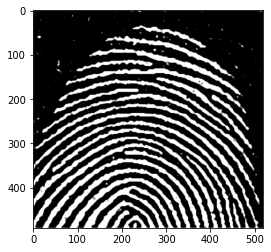

Calling function


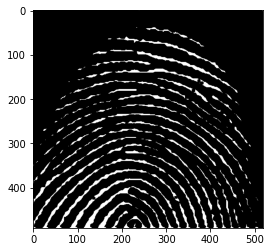

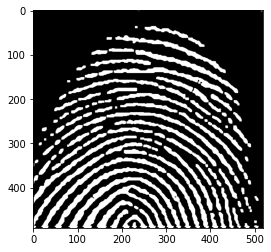

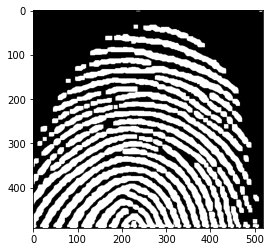

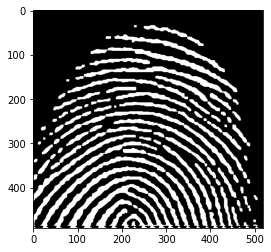

In [82]:
eroded = cv2.erode(bw_img,kernel,iterations = 1)
plt.imshow(cv2.cvtColor(im,cv2.COLOR_BGR2RGB))
plt.show()
#image will be padded with one zeros around
result_erosion1 = operation(np_img, kernel, 1, "erosion")
result_dilation1 = operation(result_erosion1, kernel, 1, "dilation")
result_dilation2 = operation(result_dilation1, kernel, 1, "dilation")
result_erosion2 = operation(result_dilation2, kernel, 1, "erosion")
print('Calling function')
result_erosion1[result_erosion1 > 0] = 255
result_dilation1[result_dilation1 > 0] = 255
result_dilation2[result_dilation2 > 0] = 255
result_erosion2[result_erosion2 > 0] = 255
plt.imshow(cv2.cvtColor(result_erosion1,cv2.COLOR_GRAY2BGR))
plt.show()
plt.imshow(cv2.cvtColor(result_dilation1,cv2.COLOR_GRAY2BGR))
plt.show()
plt.imshow(cv2.cvtColor(result_dilation2,cv2.COLOR_GRAY2BGR))
plt.show()
plt.imshow(cv2.cvtColor(result_erosion2,cv2.COLOR_GRAY2BGR))
plt.show()

In [83]:
# Code to count connected components
class Graph:

    def __init__(self, row, col, g):
        self.ROW = row
        self.COL = col
        self.graph = g

    # A function to check if a given cell
    # (row, col) can be included in DFS
    def isSafe(self, i, j, visited):
        # row number is in range, column number
        # is in range and value is 1
        # and not yet visited
        return (i >= 0 and i < self.ROW and
                j >= 0 and j < self.COL and
                not visited[i][j] and self.graph[i][j])


# A utility function to do DFS for a 2D
# boolean matrix. It only considers
# the 8 neighbours as adjacent vertices
    def DFS(self, i, j, visited):

        # These arrays are used to get row and
        # column numbers of 8 neighbours
        # of a given cell
        rowNbr = [-1, -1, -1, 0, 0, 1, 1, 1];
        colNbr = [-1, 0, 1, -1, 1, -1, 0, 1];

        # Mark this cell as visited
        visited[i][j] = True

        # Recur for all connected neighbours
        for k in range(8):
            if self.isSafe(i + rowNbr[k], j + colNbr[k], visited):
                self.DFS(i + rowNbr[k], j + colNbr[k], visited)


# The main function that returns
# count of islands in a given boolean
# 2D matrix
    def countIslands(self):
        # Make a bool array to mark visited cells.
        # Initially all cells are unvisited
        visited = [[False for j in range(self.COL)]for i in range(self.ROW)]

        # Initialize count as 0 and travese
        # through the all cells of
        # given matrix
        count = 0
        for i in range(self.ROW):
            for j in range(self.COL):
                # If a cell with value 1 is not visited yet,
                # then new island found
                if visited[i][j] == False and self.graph[i][j] == 1:
                    # Visit all cells in this island
                    # and increment island count
                    self.DFS(i, j, visited)
                    count += 1

        return count


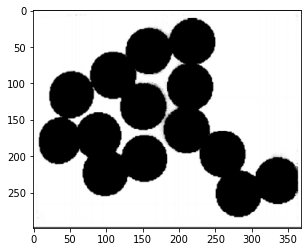

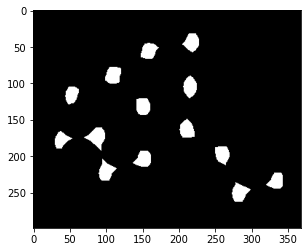

In [84]:
img = cv2.imread('/kaggle/input/ivpassignment2/disks.png')
im1 = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
im = cv2.medianBlur(im1,5)
sz = 5
im = ~im
kernel=cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(7,7))
ret, bw_img = cv2.threshold(im, 127, 255, cv2.THRESH_BINARY)
eroded = cv2.erode(bw_img,kernel,iterations = 7)
plt.imshow(img)
plt.show()
plt.imshow(cv2.cvtColor(eroded,cv2.COLOR_BGR2RGB))
plt.show()
np_img = np.array(eroded)
np_img[np_img > 0] = 1
#image will be padded with one zeros around
#result_erosion1 = operation(np_img, kernel, 1, "erosion")

In [85]:
row = len(np_img)
col = len(np_img[0])

g = Graph(row, col, np_img)

print("Number of disks is:")
print(g.countIslands())


Number of disks is:
14


In [86]:
def Myrgb2hsi(rgb):
    rgb = np.array(rgb)
    r = rgb[:, :, 0]
    g = rgb[:, :, 1]
    b = rgb[:, :, 2]
    # Implement of the conversion.
    
    r, g, b = r / 255.0, g / 255.0, b / 255.0
    num = 0.5*((r - g) + (r - b))
    deno = np.sqrt((r - g)**2 + (r - b)*(g - b))
    theta = np.arccos(num/deno)
    H = np.zeros(shape=(r.shape[0],r.shape[1]))
    for i in range(r.shape[0]):
        for j in range(r.shape[1]):
            
            if b[i][j] <= g[i][j]:
                H[i][j] = theta[i][j]
            else:
                H[i][j] = 2*math.pi - theta[i][j]
                
    H = H/(2*math.pi)      #radians to degrees
    num = np.minimum(np.minimum(r, g), b)
    deno = r + g + b
    #deno(deno == 0) = eps
    S = 1 - 3* num/deno
    for i in range(r.shape[0]):
        for j in range(r.shape[1]):
            if S[i][j] == 0:
                H[i][j] = 0
    I = (r + g + b)/3

    Hue = H
    Sat = S
    Intensity = I
    retval = np.array([H,S,I])
    return retval


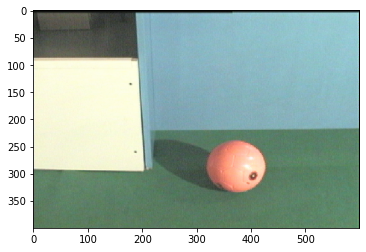

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()


Text(0.5, 1.0, 'Intensity')

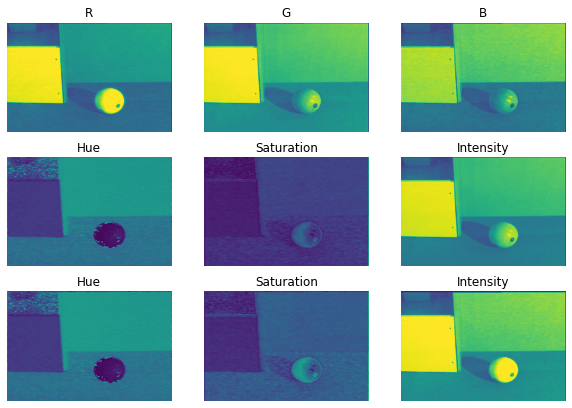

In [87]:
img = cv2.imread('/kaggle/input/ivpassignment2/ball.bmp')
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(rgb)
plt.show()

#Calling conversion function
hsi = Myrgb2hsi(rgb)
h = hsi[0,:,:]
s = hsi[1,:,:]
i = hsi[2,:,:]

r = rgb[:, :, 0]
g = rgb[:, :, 1]
b = rgb[:, :, 2]

# create figure
fig = plt.figure(figsize=(10, 7))
  
# setting values to rows and column variables
rows = 3
columns = 3

# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 1)
  
# showing image
plt.imshow(r)
plt.axis('off')
plt.title("R")

# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 2)
  
# showing image
plt.imshow(g)
plt.axis('off')
plt.title("G")
# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 3)
  
# showing image
plt.imshow(b)
plt.axis('off')
plt.title("B")

# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 4)
  
# showing image
plt.imshow(h)
plt.axis('off')
plt.title("Hue")

# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 5)
  
# showing image
plt.imshow(s)
plt.axis('off')
plt.title("Saturation")

# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 6)
  
# showing image
plt.imshow(i)
plt.axis('off')
plt.title("Intensity")

hsv = cv2.cvtColor(rgb, cv2.COLOR_RGB2HSV)
h,s,v = cv2.split(hsv)

# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 7)
  
# showing image
plt.imshow(h)
plt.axis('off')
plt.title("Hue")

# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 8)
  
# showing image
plt.imshow(s)
plt.axis('off')
plt.title("Saturation")

# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 9)
  
# showing image
plt.imshow(v)
plt.axis('off')
plt.title("Intensity")

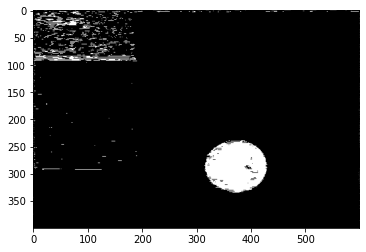

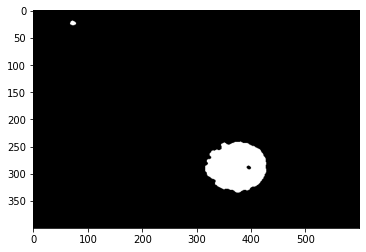

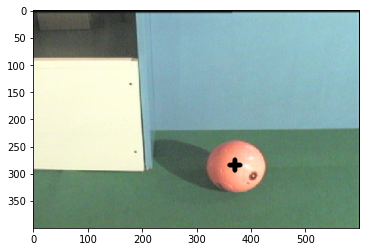

In [88]:
img = cv2.imread('/kaggle/input/ivpassignment2/ball.bmp')
img2hsv = hsi
hsv = np.array(img2hsv)
Hspace = hsv[0, :, :]

Hspace = Hspace/np.max(Hspace)
Hspace = Hspace*255
Hspace = Hspace.astype('uint8')
ret, Hspace = cv2.threshold(Hspace,30,255,cv2.THRESH_BINARY_INV)

plt.imshow(Hspace, cmap= 'gray')
plt.show()

s1 = np.ones((4,4),np.uint8)
s2 = np.ones((8,8),np.uint8)
s1 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(7,7))
Hspace = cv2.morphologyEx(Hspace, cv2.MORPH_OPEN, s1)#cv2.erode(Hspace, s1, iterations = 1)
Hspace = cv2.morphologyEx(Hspace, cv2.MORPH_CLOSE, s1)#cv2.dilate(erosion, s2, iterations = 1)

plt.imshow(Hspace, cmap= 'gray')
plt.show()

# calculate moments of binary image
M = cv2.moments(Hspace)

# calculate x,y coordinate of center
cX = int(M["m10"] / M["m00"])
cY = int(M["m01"] / M["m00"])

# put cross at the center
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2.line(img, (cX-10, cY), (cX+10, cY), (0, 0, 0), 8)
cv2.line(img, (cX, cY-10), (cX, cY+10), (0, 0, 0), 8)

plt.imshow(img)
plt.show()


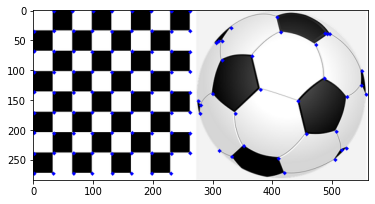

In [89]:
# Implementation of Harris Corner detection algorithm
# This algoruthm is very useful in corner detection and is used in a number of applications
# It's also used in algorithms like FAST and ORB(which uses FAST and BREIF)

import numpy as np
import cv2
import glob


# Kernel operation using input operator of size 3*3
def GetSobel(image, Sobel, width, height):
    # Initialize the matrix
    I_d = np.zeros((width, height), np.float32)

    # For every pixel in the image
    for rows in range(width):
        for cols in range(height):
            # Run the Sobel kernel for each pixel
            if rows >= 1 or rows <= width-2 and cols >= 1 or cols <= height-2:
                for ind in range(3):
                    for ite in range(3):
                        I_d[rows][cols] += Sobel[ind][ite] * image[rows - ind - 1][cols - ite - 1]
            else:
                I_d[rows][cols] = image[rows][cols]

    return I_d


# Method implements the Harris Corner Detection algorithm
def HarrisCornerDetection(image):

    # The two Sobel operators - for x and y direction
    SobelX = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    SobelY = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])

    w, h = image.shape

    # X and Y derivative of image using Sobel operator
    ImgX = GetSobel(image, SobelX, w, h)
    ImgY = GetSobel(image, SobelY, w, h)

    # # Eliminate the negative values
    # There are multiple ways this can be done
    # 1. Off setting with a positive value (commented out below)
    # 2. Setting negative values to Zero (commented out)
    # 3. Multiply by -1 (implemented below, found most reliable method)
    # ImgX += 128.0
    # ImgY += 128.0
    for ind1 in range(w):
        for ind2 in range(h):
            if ImgY[ind1][ind2] < 0:
                ImgY[ind1][ind2] *= -1
                # ImgY[ind1][ind2] = 0
            if ImgX[ind1][ind2] < 0:
                ImgX[ind1][ind2] *= -1
                # ImgX[ind1][ind2] = 0

    # # Display the output results after Sobel operations
    # cv2.imshow("SobelX", ImgX)
    # cv2.imshow("SobelY", ImgY)

    ImgX_2 = np.square(ImgX)
    ImgY_2 = np.square(ImgY)

    ImgXY = np.multiply(ImgX, ImgY)
    ImgYX = np.multiply(ImgY, ImgX)

    #Use Gaussian Blur
    Sigma = 1.4
    kernelsize = (3, 3)

    ImgX_2 = cv2.GaussianBlur(ImgX_2, kernelsize, Sigma)
    ImgY_2 = cv2.GaussianBlur(ImgY_2, kernelsize, Sigma)
    ImgXY = cv2.GaussianBlur(ImgXY, kernelsize, Sigma)
    ImgYX = cv2.GaussianBlur(ImgYX, kernelsize, Sigma)
    # print(ImgXY.shape, ImgYX.shape)

    alpha = 0.06
    R = np.zeros((w, h), np.float32)
    # For every pixel find the corner strength
    for row in range(w):
        for col in range(h):
            M_bar = np.array([[ImgX_2[row][col], ImgXY[row][col]], [ImgYX[row][col], ImgY_2[row][col]]])
            R[row][col] = np.linalg.det(M_bar) - (alpha * np.square(np.trace(M_bar)))
    return R


#### Main Program ####
firstimage = cv2.imread("/kaggle/input/ivpassignment2/corner_test.png",0)

# Get the first image
#firstimage = cv2.imread(firstimagename, 0)
w, h = firstimage.shape

# Covert image to color to draw colored circles on it
bgr = cv2.cvtColor(firstimage, cv2.COLOR_GRAY2RGB)

# Corner detection
R = HarrisCornerDetection(firstimage)

# Empirical Parameter
# This parameter will need tuning based on the use-case
CornerStrengthThreshold = 600000

# Plot detected corners on image
radius = 1
color = (0, 0, 255)  # Green
thickness = 3

PointList = []
# Look for Corner strengths above the threshold
for row in range(w):
    for col in range(h):
        if R[row][col] > CornerStrengthThreshold:
            # print(R[row][col])
            max = R[row][col]

            # Local non-maxima suppression
            skip = False
            for nrow in range(5):
                for ncol in range(5):
                    if row + nrow - 2 < w and col + ncol - 2 < h:
                        if R[row + nrow - 2][col + ncol - 2] > max:
                            skip = True
                            break

            if not skip:
                # Point is expressed in x, y which is col, row
                cv2.circle(bgr, (col, row), radius, color, thickness)
                PointList.append((row, col))

# Display image indicating corners and save it
plt.imshow(bgr)
plt.show()

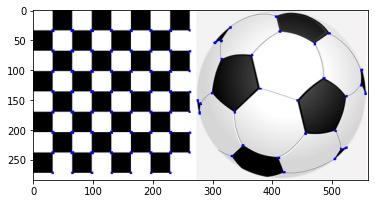

In [90]:
filename = '/kaggle/input/ivpassignment2/corner_test.png'
img = cv2.imread(filename)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

gray = np.float32(gray)
dst = cv2.cornerHarris(gray,2,3,0.04)

#result is dilated for marking the corners, not important
dst = cv2.dilate(dst,None)

# Threshold for an optimal value, it may vary depending on the image.
img[dst>0.01*dst.max()]=[0,0,255]

# Display image indicating corners and save it
plt.imshow(img)
plt.show()

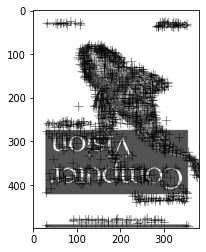

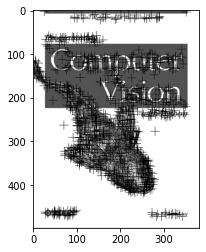

Corr size:  1038  NumInliers:  1027 Max inliers:  1027
Final homography:  [[-9.99115409e-01 -1.11925626e-03  3.80568657e+02]
 [ 1.27520893e-03 -1.00135518e+00  4.98584588e+02]
 [ 6.31853448e-06 -5.55355257e-06  1.00000000e+00]]
Final inliers count:  1027
done


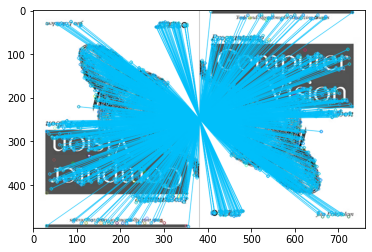

In [91]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

#
#Calculate the geometric distance between estimated points and original points
#
def geometricDistance(correspondence, h):

    p1 = np.transpose(np.matrix([correspondence[0].item(0), correspondence[0].item(1), 1]))
    estimatep2 = np.dot(h, p1)
    estimatep2 = (1/estimatep2.item(2))*estimatep2

    p2 = np.transpose(np.matrix([correspondence[0].item(2), correspondence[0].item(3), 1]))
    error = p2 - estimatep2
    return np.linalg.norm(error)

#
#Runs through ransac algorithm, creating homographies from random correspondences
#
def ransac(corrs, thresh):
    maxInliers = []
    finalH = None
    for i in range(1000):
        corr1 = corrs[random.randrange(0, len(corrs))]
        corr2 = corrs[random.randrange(0, len(corrs))]
        corr3 = corrs[random.randrange(0, len(corrs))]
        corr4 = corrs[random.randrange(0, len(corrs))]
        
        pts1 = []
        pts1.append(np.float32([corr1.item(0),corr1.item(1)]))
        pts1.append(np.float32([corr2.item(0),corr2.item(1)]))
        pts1.append(np.float32([corr3.item(0),corr3.item(1)]))
        pts1.append(np.float32([corr4.item(0),corr4.item(1)]))
        
        pts2 = []
        pts2.append(np.float32([corr1.item(2),corr1.item(3)]))
        pts2.append(np.float32([corr2.item(2),corr2.item(3)]))
        pts2.append(np.float32([corr3.item(2),corr3.item(3)]))
        pts2.append(np.float32([corr4.item(2),corr4.item(3)]))
        
        #call the homography function on those points
        h,mask = cv2.findHomography(np.float32(pts1), np.float32(pts2))
        
        inliers = []
        # Need to draw only inliers, so create a mask
        matchesMask = [0]*len(corrs)
        for i in range(len(corrs)):
            d = geometricDistance(corrs[i], h)
            if d < 5:
                inliers.append(corrs[i])
                matchesMask[i] = 1

        if len(inliers) > len(maxInliers):
            maxInliers = inliers
            finalH = h
            mask = matchesMask
        print("Corr size: ", len(corrs), " NumInliers: ", len(inliers), "Max inliers: ", len(maxInliers))

        if len(maxInliers) > (len(corrs)*thresh):
            break
    return finalH, maxInliers, mask

MIN_MATCH_COUNT = 10
estimation_thresh = 0.60

img1 = cv2.imread('/kaggle/input/ivpassignment2/FM_img2.jpg',0)          # queryImage
img2 = cv2.imread('/kaggle/input/ivpassignment2/FM_img1.jpg',0) # trainImage

# Initiate SIFT detector
sift = cv2.SIFT_create()

# find the keypoints and descriptors with SIFT
correspondenceList = []
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)
keypoints = [kp1,kp2]

img1kp = img1.copy()
for marker in kp1:
	img1kp = cv2.drawMarker(img1kp, tuple(int(i) for i in marker.pt), color=(0,191,250))

img2kp = img2.copy()
for marker in kp2:
	img2kp = cv2.drawMarker(img2kp, tuple(int(i) for i in marker.pt), color=(0,191,250))

plt.imshow(img1kp, cmap='gray')
plt.show()

plt.imshow(img2kp, cmap='gray')
plt.show()


FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks = 50)

flann = cv2.FlannBasedMatcher(index_params, search_params)

matches = flann.knnMatch(des1,des2,k=2)

# store all the good matches as per Lowe's ratio test.
good = []
for m,n in matches:
    if m.distance < 0.7*n.distance:
        good.append(m)

if len(good)>MIN_MATCH_COUNT:
    src_pts = np.float32([ kp1[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
    dst_pts = np.float32([ kp2[m.trainIdx].pt for m in good ]).reshape(-1,1,2)
    
    for match in good:
        (x1, y1) = keypoints[0][match.queryIdx].pt
        (x2, y2) = keypoints[1][match.trainIdx].pt
        correspondenceList.append([x1, y1, x2, y2])

    corrs = np.matrix(correspondenceList)
    
    #run ransac algorithm
    finalH, maxInliers, mask = ransac(corrs, estimation_thresh)       
    print("Final homography: ", finalH)
    print("Final inliers count: ", len(maxInliers))
    draw_params = dict(matchColor = (0,191,250), # draw matches in deep sky blue color
                   singlePointColor = None,
                   matchesMask = mask, # draw only inliers
                   flags = 0)

    img3 = cv2.drawMatches(img1,kp1,img2,kp2,good,None,**draw_params)

    plt.imshow(img3)
    plt.show
    
    print("done")